# Вычисление объёма трёхмерной фигуры с помощью метода Монте-Карло

## 1. Подключение модулей

Подключим библиотеку hypersand для вычисления объема. Для простоты hypersand сократим до hs.

Для того, чтобы построить окружность, подключим библиотеки pandas (т.к. основным контейнером данных в hypersand является DataFrame из pandas) и numpy (для легкого манипулирования данными).

In [1]:
%matplotlib notebook
import hypersand as hs
import pandas as pd
import numpy as np

## 2. Определение осей

Назовем оси для будущей сферы: "x", "y" и "z":

In [2]:
keys = ["x",
        "y",
        "z"]

## 3. Генерация данных

Зададим точность измерений: 1e-1 (для сокращения времени). Определим радиус сферы равным 1. Чтобы в фазовой плоскости получилась сфера, вспомним математический анализ.

Уравнение сферы:

x(t, p) = r * sin(t) * cos(p)  
y(t, p) = r * sin(t) * sin(p)  
z(t, p) = r * cos(t)

<IPython.core.display.Javascript object>


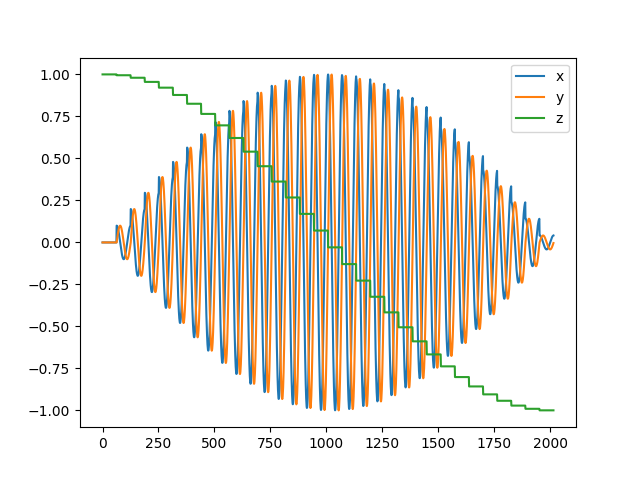

In [3]:
precision = 1e-1

radius = 1
theta = np.arange(0, np.pi, precision)
phi = np.arange(0, 2 * np.pi, precision)

x = []
y = []
z = []

data = pd.DataFrame()
for t in theta:
    for p in phi:
        x.append(radius * np.sin(t) * np.cos(p))
        y.append(radius * np.sin(t) * np.sin(p))
        z.append(radius * np.cos(t))
data[keys[0]] = x
data[keys[1]] = y
data[keys[2]] = z
data.plot()

## 4. Генерация случайных точек

Сгенерируем 100 случайных точек. Посмотрим, как наш график выглядит в фазовой плоскости. А так же, выведем сгенерированные точки.

<IPython.core.display.Javascript object>


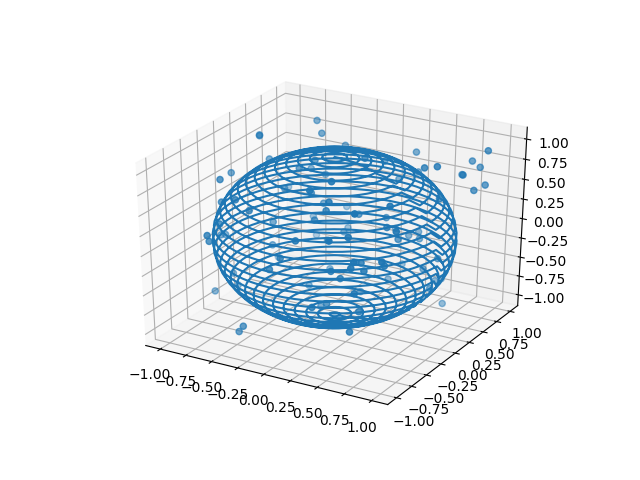

In [4]:
rp = hs.throw_points(data, 100)
hs.plt3d([data, rp], ["plot", "scatter"])

## 5. Пересечения для 0-й точки

Построим плоскости, параллельные осям x, y и z, пересекающие условную 0-ю точку, и найдем точки пересечения этих плоскостей с фигурой.

<IPython.core.display.Javascript object>


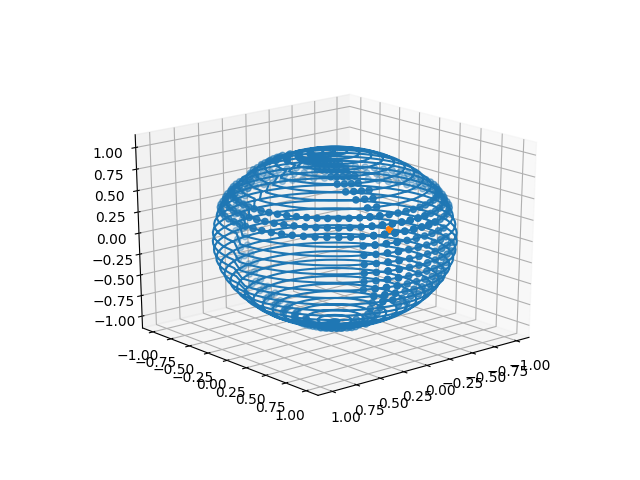

In [5]:
intersections = hs.get_intersections(data, rp.iloc[0], precision)
hs.plt3d([data, intersections, rp.iloc[0]], ["plot", "scatter", "scatter"])

## 6. Определение попаданий

То же самое проделаем со всеми остальными точками. Если точка оказалась вне границ фигуры, будем считать, то она не попала в фигуру.

Важно: вычисления могут занять достаточно долгое время. В данном случае порядка 3 минут. Время зависит от размерности, общего количества точек в фигуре, количества случайно сгенерированных точек, а так же от производительности процессора.

<IPython.core.display.Javascript object>


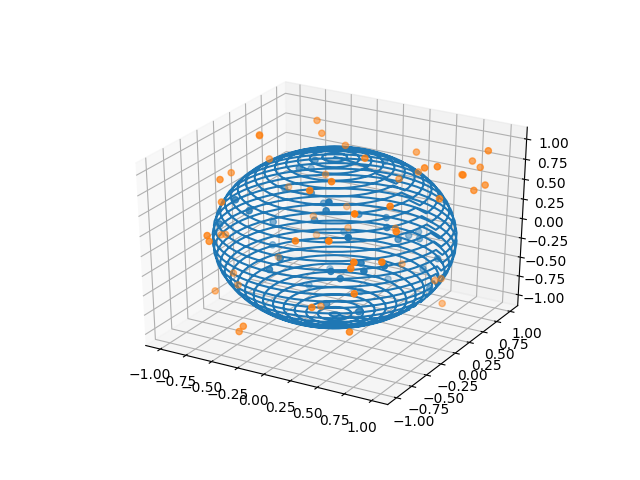

In [6]:
[hits, misses] = hs.hit_analysis(data, rp, precision)
hs.plt3d([data, hits, misses], ["plot", "scatter", "scatter"])

## 7. Вычисление объёма

### Вычисленное значение:

Вычислим объем внутренней части сферы с помощью формулы: объем фигуры = объем параллелепипеда * количество попаданий / общее количество бросков.

In [7]:
volume = hs.cuboid_volume(data) * len(hits) / len(rp)
print(volume)

3.3533886103720216


Можно было пропустить пункты 5 и 6 - вызвать функцию, которая уже включает в себя операции из пунктов 5 и 6, и получить тот же ответ:

In [8]:
volume = hs.montecarlo(data, rp, precision)
print(volume)

3.3533886103720216


### Теоритическое значение:

Как известно из геометрии, теоретическое значение объема единичной сферы должно быть равно числу $\frac{4}{3}\pi$.

In [9]:
theoretical = 4/3 * np.pi * radius**2
print(theoretical)

4.1887902047863905


### Ошибка

Ошибка составляет:

In [10]:
print(theoretical - volume)

0.8354015944143689
